<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-AxelAlex351/blob/main/Regresion_lineal_polinomial_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresiones y K means

#Axel Alejandro Tlatoa Villavicencio

#A01363351

# Ciencia y Analítica de Datos.


# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [673]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [674]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [675]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

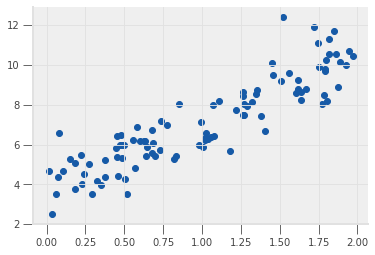

In [676]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [677]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [678]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [679]:
#X_fit[]

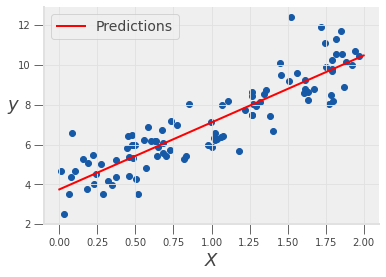

In [680]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [681]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [682]:
X_new.shape

(2, 1)

In [683]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [684]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [685]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [686]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

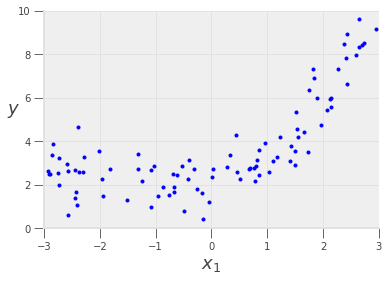

In [687]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [688]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [689]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [690]:
X_poly[:3]

array([[2.72919168, 7.44848725],
       [1.4273815 , 2.03741795],
       [0.32612432, 0.10635707]])

`X_poly` now contains the original feature of X plus the square of the feature:

In [691]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [692]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [693]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

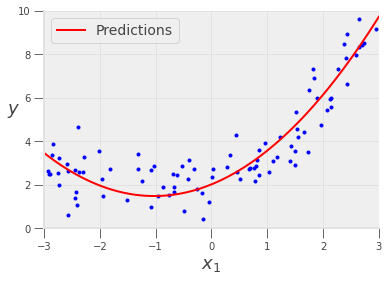

In [694]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [695]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [696]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [697]:
len(X)

1000

In [698]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

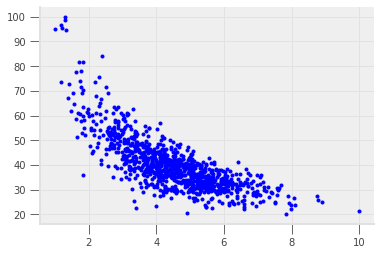

In [699]:
plt.plot(X,y,'b.')

Primero que nada hay que particionar los datos, se utilizará 80% de datos para el entrenamiento de los modelo y 20% par los de prueba.

In [700]:
#Funciones de graficación.
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12/2
    height = 10/2
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Número de unidades')
    plt.ylabel('Costo de manufactura')

    plt.show()
    plt.close()

In [701]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12/2
    height = 10/2
    plt.figure(figsize=(width, height))
    
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function', Linewidth = 3)
    plt.legend()

In [702]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11) # 80% training, 20% test split 
print("número de muestras de prueba:", x_test.shape[0])
print("número de muestras de entrenamiento:",x_train.shape[0])

número de muestras de prueba: 200
número de muestras de entrenamiento: 800


In [703]:
#lineal

In [704]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression(fit_intercept=True)

Ajustamos la variable predictora que en este caso es el número de unidades que genera una relación vs la variable objetivo costo de manufactura.

In [705]:
Regresion_lineal = lre.fit(x_train[['Number of Units']], y_train)

In [706]:
Rsqrtest=lre.score(x_test[['Number of Units']], y_test)
print(f'Valor de R cuadrada modelo de prueba: {Rsqrtest * 100}%')
Rsqrtrain = lre.score(x_train[['Number of Units']], y_train) 
print(f'Valor de R cuadrado modelo de entrenamiento: {Rsqrtrain * 100}%') 

Valor de R cuadrada modelo de prueba: 48.43996957799938%
Valor de R cuadrado modelo de entrenamiento: 59.4243664202029%


$R^{2} = \bigg( 1 - \frac{\sum(\hat{y_{i}}-\bar{y})^{2}}{\sum (y_{i}-\bar{y})^{2}}\bigg)$

Observamos que $R^{2}_{test} < R^{2}_{train}$ entonces nuestro ajuste lineal tiende a tener mejor rendimiento pero no el deseado, esto simplemente nos da una pauta para creer que en realidad sí existe una correlación entre ambas variables y que se puede encontrar un modelo que se ajuste a los datos de prueba con un mejor modelo de entrenamiento. Recordemos que mientras el cociente de los $MSE$ → 0 entonces la $R^{2}$ → 1 o 100% indicando que el modelo tiene muy buen ajuste.

In [707]:
yhat_train = lre.predict(x_train[['Number of Units']])
yhat_train[0:5]

array([32.88233458, 33.6311159 , 54.03657143, 31.34550268, 40.1637977 ])

In [708]:
yhat_test = lre.predict(x_test[['Number of Units']])
yhat_test[0:5]

array([56.68762262, 41.2365883 , 42.75989178, 35.3110131 , 34.79472525])

In [709]:
print(f'coeficiente de regresión lineal: {Regresion_lineal.coef_}')
print(f'intercepto regresión lineal: {Regresion_lineal.intercept_}')

coeficiente de regresión lineal: [-6.22263745]
intercepto regresión lineal: 68.08187672497846


In [710]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,X[['Number of Units']], y,cv=4)
yhat[0:5]

array([51.3448283 , 50.64271938, 50.62193854, 50.5718351 , 50.21698837])

***Ecuación Regresión Lineal***:

$\hat{y} = -6.22263745 \cdot x+ 68.08187672497846$

In [711]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train,yhat_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,yhat_train)))
print('r2_score',r2_score(y_train,yhat_train))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,yhat_test)))
print('r2_score',r2_score(y_test,yhat_test))

Error medio Absoluto (MAE): 4.983664639039784
Root Mean Squared Error: 6.930601695798021
r2_score 0.594243664202029
Error medio Absoluto (MAE): 4.83324114398872
Root Mean Squared Error: 6.6682038827508405
r2_score 0.48439969577999376


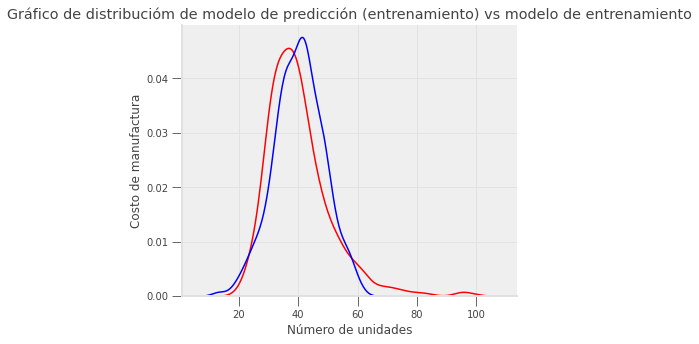

In [712]:
import warnings
warnings.filterwarnings("ignore")
Title = 'Gráfico de distribucióm de modelo de predicción (entrenamiento) vs modelo de entrenamiento'
DistributionPlot(y_train, yhat_train, "Valores reales (entrenamiento)", "valores de predicción (entrenamiento)", Title)

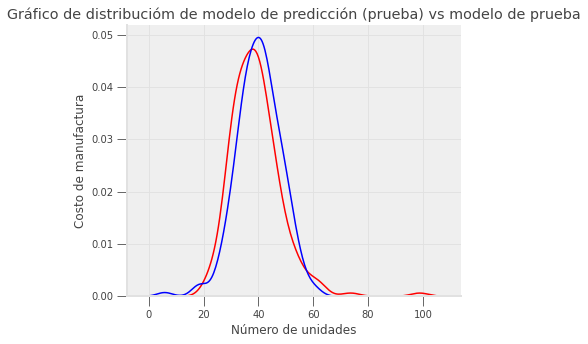

In [713]:
Title ='Gráfico de distribucióm de modelo de predicción (prueba) vs modelo de prueba'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Vemos que las distribuciones son muy similares, ahora resta graficar la relación.


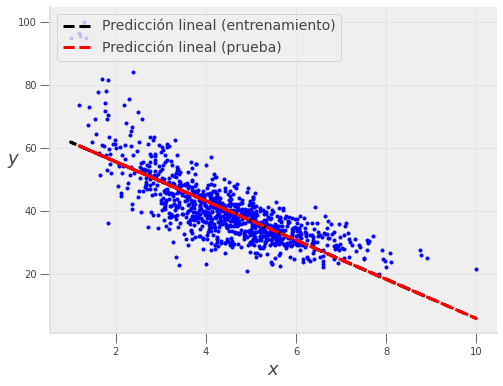

In [714]:
plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.plot(x_train,yhat_train, 'k--' , Linewidth = 3,  label = 'Predicción lineal (entrenamiento)')
plt.plot(x_test,yhat_test, 'r--' , Linewidth = 3,  label = 'Predicción lineal (prueba)')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

Vemos que no se ajusta el modelo del todo bien porque no toma muchos puntos de la muestra pese a tener una tendencia negativa o pendiente negativa, es claro ver el patrón de los datos entorno a una curva. 

In [715]:
from sklearn.linear_model import Ridge
Ridge_Model=Ridge(alpha = 1)
Ridge_Model.fit(x_train, y_train)

yhat_Rid = Ridge_Model.predict(x_test)
print('conjunto de predicción:', yhat_Rid[0:4])
print('conjunto de prueba:', y_test[0:4].values)
print('\n')
print(f'coeficiente de regresión Ridge: {Ridge_Model.coef_}')
print(f'intercepto regresión Ridge: {Ridge_Model.intercept_}')

conjunto de predicción: [56.67633773 41.23592713 42.75818323 35.3144262 ]
conjunto de prueba: [36.08580039 43.95664701 37.80605145 28.23953024]


coeficiente de regresión Ridge: [-6.21835893]
intercepto regresión Ridge: 68.06275744904224


***Ecuación Regresión Ridge***:

$\hat{y}_{Ridge} = -6.2183 \cdot x+68.0627$

In [716]:
from sklearn import linear_model
lasso_linear = linear_model.Lasso(alpha = 1)
lasso_linear.fit(x_train, y_train)

yhat_L = lasso_linear.predict(x_test)

print('conjunto de predicción:', yhat_L[0:4])
print('conjunto de prueba:', y_test[0:4].values)
print('\n')
print(f'coeficiente de regresión lasso: {lasso_linear.coef_}')
print(f'intercepto regresión lasso: {lasso_linear.intercept_}')

conjunto de predicción: [55.23580702 41.1515285  42.54008476 35.7501133 ]
conjunto de prueba: [36.08580039 43.95664701 37.80605145 28.23953024]


coeficiente de regresión lasso: [-5.67220014]
intercepto regresión lasso: 65.62215689703874


***Ecuación Regresión Lasso***:

$\hat{y}_{Lasso} = -5.67220014 \cdot x+65.62215689703874$

Exploremos ahora la cuestión polinomial.

In [717]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

In [718]:
# We create a polynomial object
polynom = PolynomialFeatures(degree = 4, include_bias = False) #Grado 4
x_train_pol = polynom.fit_transform(x_train[['Number of Units']])
x_test_pol = polynom.fit_transform(x_test[['Number of Units']])
polynom.fit(x_train_pol, y_train)

PolynomialFeatures(degree=4, include_bias=False)

In [719]:
poly = LinearRegression()
poly.fit(x_train_pol, y_train)
yhat_pol = poly.predict(x_test_pol)
yhat_pol[0:5]

array([66.63801208, 38.80954601, 40.09198091, 34.81942794, 34.51406097])

In [720]:
print("Predicciones:", yhat_pol[0:4])
print("Valores reales:", y_test[0:4].values)

Predicciones: [66.63801208 38.80954601 40.09198091 34.81942794]
Valores reales: [36.08580039 43.95664701 37.80605145 28.23953024]


In [721]:
equation = linear_reg.fit(x_train_pol,y_train)
equation.coef_, equation.intercept_


(array([-57.68896926,  13.45235271,  -1.49636964,   0.06298585]),
 135.64639742435577)

$\hat{y}_{polynomial} = -18.25411211x+1.31795934x^{2}+93.13383408447208$

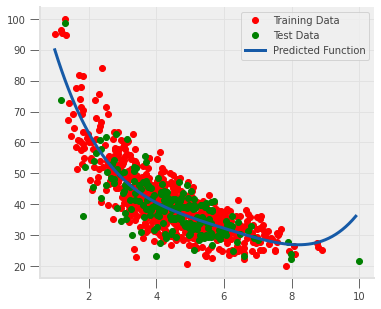

In [722]:
PollyPlot(x_train[['Number of Units']], x_test[['Number of Units']], y_train, y_test, poly,polynom)

In [723]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,yhat_pol))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,yhat_pol)))
print(f'r2_score {r2_score(y_test,yhat_pol)*100}%')

Error medio Absoluto (MAE): 4.577486360063557
Root Mean Squared Error: 6.1643690254102985
r2_score 55.93713987048976%


In [724]:
Ridge_Model_pol=Ridge(alpha = 0.01)
Ridge_Model_pol.fit(x_train_pol, y_train)
yhat_Rid_pol = Ridge_Model_pol.predict(x_test_pol)
print('conjunto de predicción:', yhat_Rid_pol[0:4])
print('conjunto de prueba:', y_test[0:4].values)
print('\n')
print(f'coeficiente de regresión Ridge: {Ridge_Model_pol.coef_}')
print(f'intercepto regresión Ridge: {Ridge_Model_pol.intercept_}')

conjunto de predicción: [66.61156571 38.80076951 40.09014831 34.804005  ]
conjunto de prueba: [36.08580039 43.95664701 37.80605145 28.23953024]


coeficiente de regresión Ridge: [-56.8183592   13.14925158  -1.45316595   0.0608291 ]
intercepto regresión Ridge: 134.80104885568753


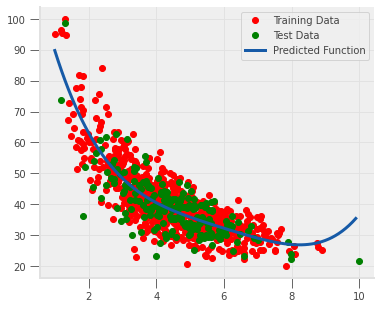

In [725]:
PollyPlot(x_train[['Number of Units']], x_test[['Number of Units']], y_train, y_test, Ridge_Model_pol,polynom)

In [726]:
print(f'r2_score {r2_score(y_test,yhat_Rid_pol)*100}%')

r2_score 56.058030781348336%


In [727]:
lasso_linear_pol = linear_model.Lasso(alpha = 1)
lasso_linear_pol.fit(x_train_pol, y_train)

yhat_L_pol = lasso_linear.predict(x_test)

print('conjunto de predicción:', yhat_L_pol[0:4])
print('conjunto de prueba:', y_test[0:4].values)
print('\n')
print(f'coeficiente de regresión lasso: {lasso_linear_pol.coef_}')
print(f'intercepto regresión lasso: {lasso_linear_pol.intercept_}')

conjunto de predicción: [55.23580702 41.1515285  42.54008476 35.7501133 ]
conjunto de prueba: [36.08580039 43.95664701 37.80605145 28.23953024]


coeficiente de regresión lasso: [-0.00000000e+00 -2.35808792e+00  2.44377739e-01 -2.13287605e-03]
intercepto regresión lasso: 65.15301980624831


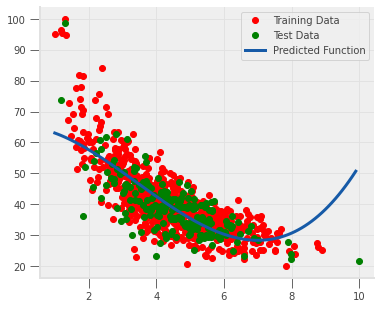

In [728]:
PollyPlot(x_train[['Number of Units']], x_test[['Number of Units']], y_train, y_test, lasso_linear_pol,polynom)

In [729]:
print(f'r2_score {r2_score(y_test,yhat_L_pol)*100}%')

r2_score 50.00928643191259%


Ahora sí podemos apreciar un mejor ajuste en cuánto al modelo polinomial y los datos, vemos que sí tiene una apariencia cuadrática o de orden mayor ya que indica que es una curva, ahora podemos concluir que el modelo que mejor se ajusta sin realmente llegar al sobre-entrenamiento es el moodelo polinomial mediante Ridge con $\alpha = 0.01$ pues da un $R^{2} = 0.56$ cercano aa $1$ sin embargo no es tan buena aproximación, se podría aumentar este coeficiente sí jugamos con alpha y con el orden del polinomio, aunque personalmente estoy inclinado a no aumentar la complejidad pues el modelo va a sobre ajustarse en algún punto, además la tendencia de los datos presenta una forma de estilo distribución exponcial $D(x) = 1-e^{-\lambda x}$, como se muestra a continuación. Sin embargo el modelo que mejor podría ajustarse es el polinomial de grado 4 mediante Ridge y de manera más subentrenada el lineal, que se ajusta tan solo un $0.50$.

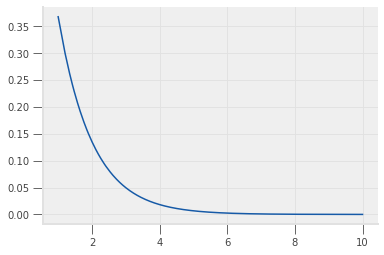

In [730]:
plt.plot(X, np.exp(-X))

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [731]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [733]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [734]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [735]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062


Normalizamos los datos para evitar el sezgo mediante la técnica de estandarización:

$z = \frac{(x-\mu)}{\sigma}$

In [736]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_1 = pd.DataFrame(scaler.transform(df), columns = df.columns)
df_1.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375


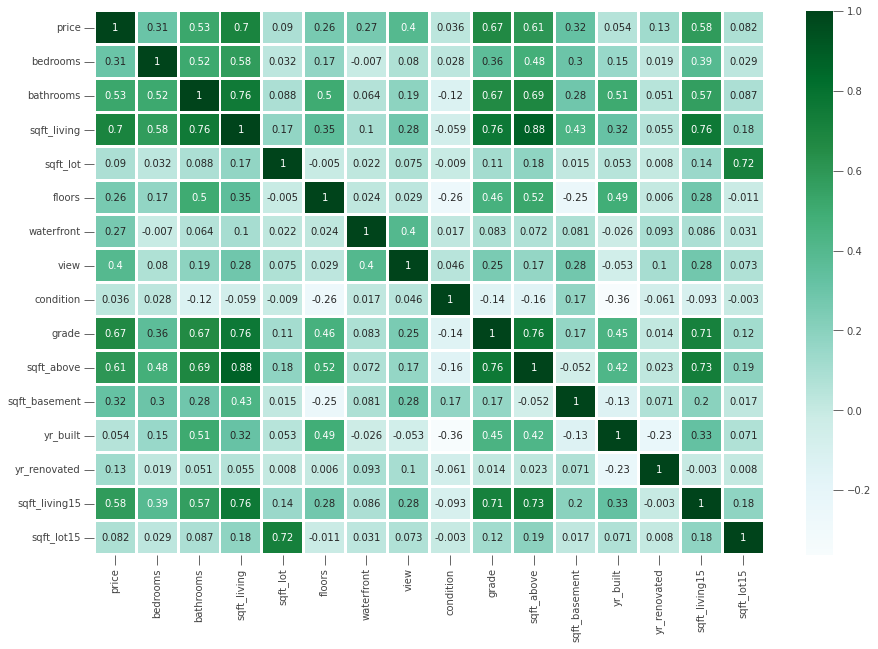

In [737]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df_1.corr().round(3), annot=True, cmap='BuGn', linewidths = 2)
plt.show()

Vemos que hay una buena correlación entre las variables del precio $y(x)$ y las variables independientes con mayor correlación son: square feet (sqft) living, grade, sqft above, sqft_living15, bathrooms como buenas predictoras de la misma variable objetivo. 

In [738]:
columns = df_1.columns.drop('price')

features = columns
label = ['price']

X = df_1[features]
y = df_1[label]

In [739]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) # 90% training, 10% test split

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [740]:
#tu codigo aquí

In [741]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    # training data 
    # testing data 
    # lr:  linear regression object 
    # poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function', linewidth = 3)
    plt.ylabel('Price')
    plt.legend()

In [742]:
pr = PolynomialFeatures(degree = 8) # n-th order polynom
lr = LinearRegression()
RiMod_lr = Ridge(alpha = 100)
lasso_lr = linear_model.Lasso(alpha = 0.01)

Consideremos las variables con mayor correlación, es decir, $<0.55$, para ver si son buenas predictoras de la variable $Y$.

**Regresión Lineal Múltiple**

In [743]:
Multiple_lr = lr.fit(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']],y_train)
print(f'Coeficiente de la regresión lineal múltiple: {Multiple_lr.coef_}')
y_hat_multiple = Multiple_lr.predict(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
print('conjunto de predicción:', y_hat_multiple[0:4])
print('conjunto de prueba:', y_test[0:4].values)

Coeficiente de la regresión lineal múltiple: [[ 0.56358375  0.33634321 -0.19162178  0.05596434]]
conjunto de predicción: [[-0.68178223]
 [ 0.15455833]
 [ 0.14880861]
 [-0.15982024]]
conjunto de prueba: [[-0.51792006]
 [-0.24539241]
 [ 0.2585318 ]
 [-0.50280234]]


In [744]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_hat_multiple))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_hat_multiple)))
print(f'r2_score {r2_score(y_test,y_hat_multiple)*100}%')

Error medio Absoluto (MAE): 0.435277263950062
Root Mean Squared Error: 0.7305526876745458
r2_score 54.34354191181614%


**Ridge**

In [745]:
Multiple_lr_Ri= RiMod_lr.fit(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']], y_train)
print(f'Coeficiente de la regresión lineal múltiple: {Multiple_lr_Ri.coef_}')
yhat_Mul_Ri = RiMod_lr.predict(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
RiMod_lr.score(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']], y_test)

Coeficiente de la regresión lineal múltiple: [[ 0.54790995  0.33336012 -0.17680314  0.05881114]]


0.5432237949259173

In [746]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,yhat_Mul_Ri))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,yhat_Mul_Ri)))
print(f'r2_score {r2_score(y_test,yhat_Mul_Ri)*100}%')

Error medio Absoluto (MAE): 0.4351117732780065
Root Mean Squared Error: 0.7307219788525245
r2_score 54.322379492591736%


**Lasso**

In [747]:
Multiple_lr_lasso= lasso_lr.fit(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']], y_train)
print(f'Coeficiente de la regresión lineal múltiple: {Multiple_lr_lasso.coef_}')
yhat_Mul_lasso = lasso_lr.predict(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
Multiple_lr_lasso.score(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']], y_test)

Coeficiente de la regresión lineal múltiple: [ 0.49858521  0.3159648  -0.09873872  0.04177458]


0.5430454797432047

In [748]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,yhat_Mul_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,yhat_Mul_lasso)))
print(f'r2_score {r2_score(y_test,yhat_Mul_lasso)*100}%')

Error medio Absoluto (MAE): 0.4357363773582683
Root Mean Squared Error: 0.7308645936688953
r2_score 54.30454797432047%


Con los coeficientes dados se puede describir una ecuación. 

$\hat{Y} =  0.56358375x_1 + 0.33634321x_2 -0.19162178x_3 + 0.05596434x_4$

**Polinomial Múltiple**

In [749]:
pr = PolynomialFeatures(degree = 3) 

In [750]:
x_train_pr = pr.fit_transform(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
x_test_pr = pr.fit_transform(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])

In [751]:
lr.fit(x_train_pr, y_train)

LinearRegression()

In [752]:
RiMod_lr.fit(x_train_pr, y_train)

Ridge(alpha=100)

In [753]:
lasso_lr.fit(x_train_pr, y_train)

Lasso(alpha=0.01)

In [754]:
y_hat_multpol = lr.predict(x_test_pr)
y_hat_multpol[:5]

array([[-0.56840449],
       [ 0.01099475],
       [-0.00556125],
       [-0.32863375],
       [-0.48013392]])

In [755]:
y_hat_multpol_ri = RiMod_lr.predict(x_test_pr)
y_hat_multpol_ri[:5]

array([[-0.5452248 ],
       [-0.02657416],
       [ 0.00454488],
       [-0.30593913],
       [-0.46425196]])

In [756]:
y_hat_multpol_lasso = lasso_lr.predict(x_test_pr)
y_hat_multpol_lasso[:5]

array([-0.51497417, -0.0593872 ,  0.01648983, -0.21694775, -0.40333112])

In [757]:
print(f'variable predictiva regresión linear (polinomial múltiple): {y_hat_multpol[0:4]}')
print(f'variable predictiva regresión Ridge (polinomial múltiple): {y_hat_multpol_ri[0:4]}')
print(f'variable predictiva regresión Lasso (polinomial múltiple): {y_hat_multpol_lasso[0:4]}')
print(f'variable real:  {y_test[0:4].values}')

variable predictiva regresión linear (polinomial múltiple): [[-0.56840449]
 [ 0.01099475]
 [-0.00556125]
 [-0.32863375]]
variable predictiva regresión Ridge (polinomial múltiple): [[-0.5452248 ]
 [-0.02657416]
 [ 0.00454488]
 [-0.30593913]]
variable predictiva regresión Lasso (polinomial múltiple): [-0.51497417 -0.0593872   0.01648983 -0.21694775]
variable real:  [[-0.51792006]
 [-0.24539241]
 [ 0.2585318 ]
 [-0.50280234]]


In [758]:
print('Polinomial (Regresión lineal)')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_hat_multpol))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_hat_multpol)))
print('r2_score',r2_score(y_test,y_hat_multpol))
print('\n')
print('*'*50)
print('\n')
print('Polinomial (Regresión ridge)')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_hat_multpol_ri))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_hat_multpol_ri)))
print('r2_score',r2_score(y_test,y_hat_multpol_ri))
print('\n')
print('*'*50)
print('\n')
print('Polinomial (Regresión lasso)')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_hat_multpol_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_hat_multpol_lasso)))
print('r2_score',r2_score(y_test,y_hat_multpol_lasso))

Polinomial (Regresión lineal)
Error medio Absoluto (MAE): 0.38936460219888364
Root Mean Squared Error: 0.6027676581982692
r2_score 0.6891871144735343


**************************************************


Polinomial (Regresión ridge)
Error medio Absoluto (MAE): 0.3901014646593323
Root Mean Squared Error: 0.6055186040998535
r2_score 0.6863436289668583


**************************************************


Polinomial (Regresión lasso)
Error medio Absoluto (MAE): 0.39417935855850894
Root Mean Squared Error: 0.6124132033076388
r2_score 0.6791602111243046


Apreciamos que $R^{2}-score$ está alrededor de 1, así que hay que pensar en que modelo nos aporta mejor en este caso es el lineal múltiple.

Text(3, 0.75, 'R^2 Máximo')

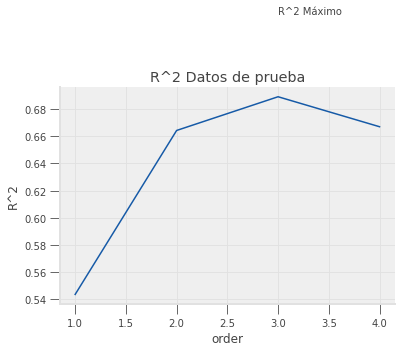

In [759]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
    
    x_test_pr = pr.fit_transform(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Datos de prueba')
plt.text(3, 0.75, 'R^2 Máximo')

Text(3, 0.75, 'R^2 Máximo')

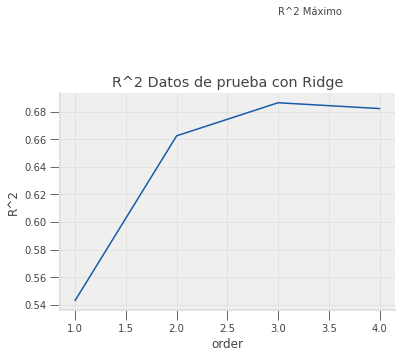

In [760]:
Rsqu_test_rid = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
    
    x_test_pr = pr.fit_transform(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])    
    
    RiMod_lr.fit(x_train_pr, y_train)
    
    Rsqu_test_rid.append(RiMod_lr.score(x_test_pr, y_test))

plt.plot(order,  Rsqu_test_rid)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Datos de prueba con Ridge')
plt.text(3, 0.75, 'R^2 Máximo')

Text(3, 0.75, 'R^2 Máximo')

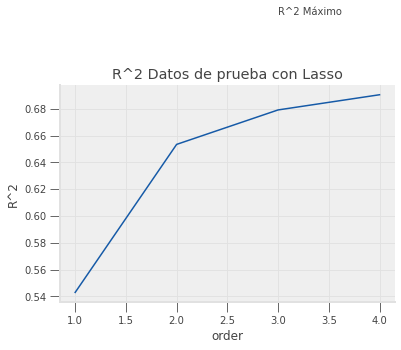

In [761]:
Rsqu_test_lasso = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
    
    x_test_pr = pr.fit_transform(X_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])    
    
    lasso_lr.fit(x_train_pr, y_train)
    
    Rsqu_test_lasso.append(lasso_lr.score(x_test_pr, y_test))

plt.plot(order,  Rsqu_test_lasso)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Datos de prueba con Lasso')
plt.text(3, 0.75, 'R^2 Máximo')

Percibimos grandes diferencias entre datos de prueba con Lasso, Ridge y Lineal, entonces podemos pensar en que ridge está castigando más para optimizar los valores de los datos de entrenamiento vs los de prueba, también notamos que uno de los mejores órdenes para poder adquirir valores más cercanos a 1 es en 3er orden, de lo contrario parece que disminuye el $R^{2}$, claro que se puede ajustar al usar un gridsearch para encontrar el mejor valor para $\alpha$ e incluso puede subir, sin embargo buscamos evitar el sobre entrenamiento, y de este modo nos conformaremos por ahora con este resultado, que es bueno, tal vez no maravilloso, y confirma nuestra teoría que con estás cuatro variables podemos describir el precio de la vivienda. 

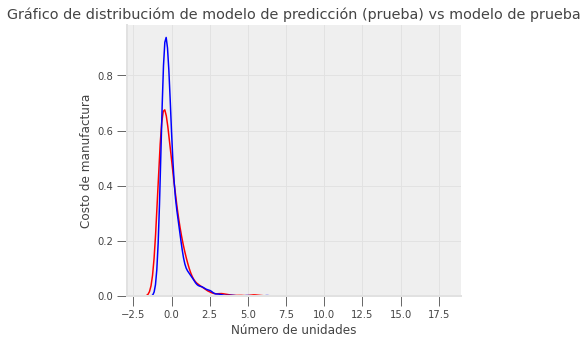

In [762]:
DistributionPlot(y_test, y_hat_multpol, "Actual Values (Test)", "Predicted Values (Test)", Title)

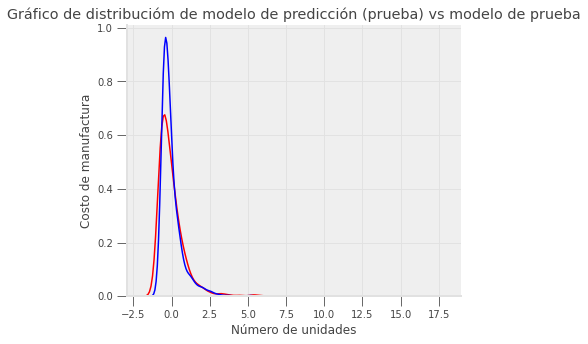

In [763]:
DistributionPlot(y_test, y_hat_multpol_ri, "Actual Values (Test)", "Predicted Values (Test)", Title)

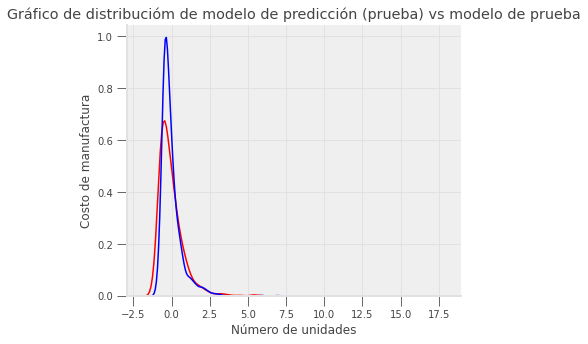

In [764]:
DistributionPlot(y_test, y_hat_multpol_lasso, "Actual Values (Test)", "Predicted Values (Test)", Title)

# K-means

Este notebook se basa en información de target


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [765]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [766]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [767]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [768]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


Definición de Latitud y Longitud

Latitud Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

Longitud: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [770]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

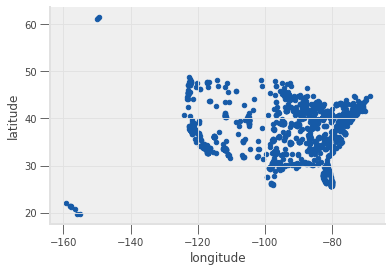

In [771]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [772]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.

In [773]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [774]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [775]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [776]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [777]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

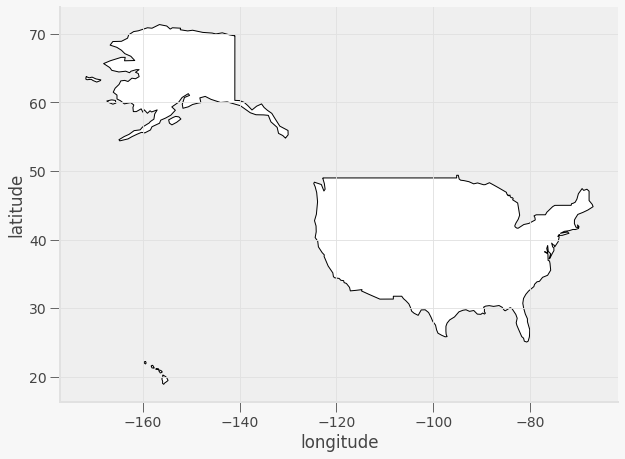

In [778]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

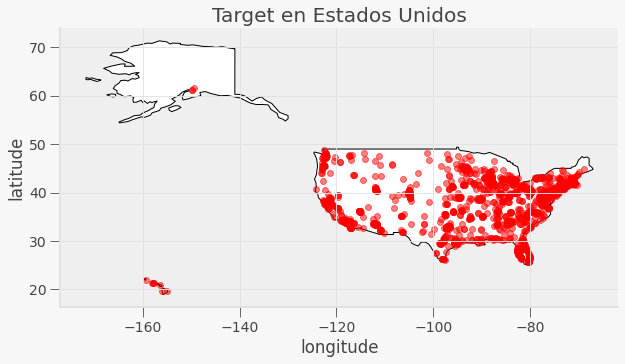

In [779]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes.

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [780]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from geopy.geocoders import Nominatim
from sklearn import metrics
from scipy.spatial.distance import cdist

In [781]:
lon = df.longitude
lat = df.latitude
Z = list(zip(lon,lat))

In [782]:
distorsion = []
inertias = []
maping0 = {}
maping1 = {}
K = range(1, 100)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Z)
    kmeanModel.fit(Z)
  
    distorsion.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(Z))
    inertias.append(kmeanModel.inertia_)
  
    maping0[k] = sum(np.min(cdist(Z, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(Z)
    maping1[k] = kmeanModel.inertia_

In [783]:
kmeans = KMeans(n_clusters=5).fit(latlong)
centroids = kmeans.cluster_centers_

In [784]:
C_df= pd.DataFrame({'longitude': centroids[:, 1],'latitude': centroids[:, 0]})
C_df["Coordenadas"] = list(zip(C_df.longitude, C_df.latitude))
C_df["Coordenadas"] = C_df["Coordenadas"].apply(Point)
C_gdf = gpd.GeoDataFrame(C_df, geometry="Coordenadas")
C_gdf.head()

,longitude,latitude,Coordenadas
0,-82.888326,31.089454,POINT (-82.88833 31.08945)
1,-119.176343,37.579774,POINT (-119.17634 37.57977)
2,-98.242075,34.406768,POINT (-98.24208 34.40677)
3,-75.598224,40.345897,POINT (-75.59822 40.34590)
4,-88.366900,41.746211,POINT (-88.36690 41.74621)


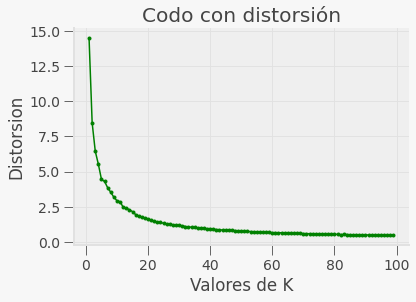

In [785]:
plt.plot(K, distorsion, 'g.-')
plt.xlabel('Valores de K')
plt.ylabel('Distorsion')
plt.title('Codo con distorsión')
plt.show()

In [786]:
geolocalizar = Nominatim(user_agent="geoapiExercises")

In [787]:
def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocalizar.reverse(coord, exactly_one=True)
    address = location.raw['address']
    ciudad = address.get('ciudad', '')
    estado = address.get('estado', '')
    codigo_postal = address.get('codigo-postal', '')
    pais = address.get('pais', '')
    row['pais'] = ciudad
    row['estado'] = estado
    row['pais'] = pais
    row['codigo-postal'] = codigo_postal
    return row
    
C_df = C_df.apply(city_state_country, axis=1)
C_df.head()

,longitude,latitude,Coordenadas,pais,estado,codigo-postal
0,-82.888326,31.089454,POINT (-82.88832609815498 31.089454400738006),,,
1,-119.176343,37.579774,POINT (-119.17634307255436 37.57977423831522),,,
2,-98.242075,34.406768,POINT (-98.24207527946128 34.40676796464647),,,
3,-75.598224,40.345897,POINT (-75.59822435625 40.34589747333333),,,
4,-88.366900,41.746211,POINT (-88.36689968794326 41.746210785815606),,,


In [788]:
distorsion = []
inercias = []
mapeo0 = {}
mapeo1 = {}
K = range(1, 20)
  
for k in K:

    kmeanModel = KMeans(n_clusters=k).fit(Z)
    kmeanModel.fit(Z)
  
    distorsion.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(Z))
    inercias.append(kmeanModel.inertia_)
  
    mapeo0[k] = sum(np.min(cdist(Z, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(Z)
    mapeo1[k] = kmeanModel.inertia_
    

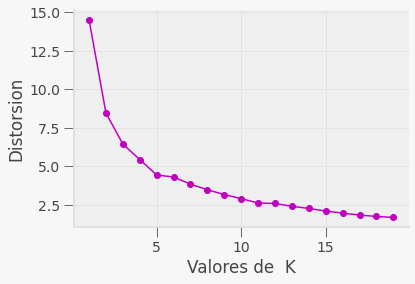

In [795]:
plt.plot(K, distorsion, 'mo-')
plt.xlabel('Valores de  K')
plt.ylabel('Distorsion')
plt.show()

Tuve dudas sobre este ejercicio, así que lo dejaré así hasta que se resuelvan.